# Atividade 3: Pandas

**Data:**  
**Nome:**

## Instruções

Para realizar esta atividade, certifique-se de que possui os arquivos `london12.csv`. Esses arquivos podem ser baixados do ColabWeb.

Acrescente suas próprias células para responder os enunciados. Ao finalizar, submeta a atividade por meio do ColabWeb.

Primeiro: configuração do *notebook*.

- NumPy: manipulação eficiente de matrizes
- Pandas: séries e tabelas (*data frames*) com índices
- Seaborn: ferramentas para manipulação de gráficos e bases de dados
- PyPlot: versão para Python de várias funções gráficas que imitam funcionalidades do Matlab

O comando `sns.set()` faz com que o pacote Seaborn mude o esquema de cores e apresentação dos gráficos do PyPlot. Você pode, se quiser, remover esse comando ou explorar suas opções.

In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

## Exercício 1

> Carregue o conjunto de dados das Olimpíadas de 2012. Verifique:
> 
> - Quantas linhas e colunas foram carregadas.
> - Quais são as colunas da base. Todas podem ser usadas como atributos?

In [105]:
londres = pd.read_csv("london12.csv")
df = pd.DataFrame(londres)
df.head()

,ID,Age,Height,Weight,Sex,Total,Sport
0,0,23,170.0,60.0,M,0,Judo
1,1,33,193.0,125.0,M,0,Athletics
2,2,30,187.0,76.0,M,0,Athletics
3,3,24,NaN,NaN,M,0,Boxing
4,4,26,178.0,85.0,F,0,Athletics


> Verifique os tipos de dados das colunas.

In [106]:
df.dtypes

ID          int64
Age         int64
Height    float64
Weight    float64
Sex        object
Total       int64
Sport      object
dtype: object

> O que significa `Sport     objetct`? Porque essa coluna não é um tipo primitivo, como `int64` ou `float64`? Pesquise e responda, de acordo com o que você encontrou, mas usando suas próprias palavras:

**Resposta**: <span style="color:aquamarine">è objeto pois é mais flexivel, otimizado para memória, legado com versões anteriormente implementadas do pandas e compatibilidade com o numpy.</span>

> A coluna `ID` pode ser usada como um atributo? Por quê?

**Resposta:** 
<span font style="color:aquamarine">Não pois é um atributo artificial, pode ser facilmente recuperado com um simples iterador e o indice da linha assume os mesmos valores<span>.

> Remova a coluna `ID` usando o método `DataFrame.drop`.

In [107]:
df.drop(columns=['ID'])

,Age,Height,Weight,Sex,Total,Sport
0,23,170.0,60.0,M,0,Judo
1,33,193.0,125.0,M,0,Athletics
2,30,187.0,76.0,M,0,Athletics
3,24,NaN,NaN,M,0,Boxing
4,26,178.0,85.0,F,0,Athletics
...,...,...,...,...,...,...
10379,24,171.0,87.0,F,0,Athletics
10380,28,172.0,56.0,F,0,Athletics
10381,27,180.0,87.0,M,0,Handball
10382,25,173.0,62.0,F,0,Athletics


> Verifique as colunas remanescentes. Use `DataFrame.head` ou acesse diretamente o índice das colunas. As colunas restantes devem ser `Age`, `Height`, `Weight`, `Sex`, `Total` e `Sport`.

In [108]:
df.head()

,ID,Age,Height,Weight,Sex,Total,Sport
0,0,23,170.0,60.0,M,0,Judo
1,1,33,193.0,125.0,M,0,Athletics
2,2,30,187.0,76.0,M,0,Athletics
3,3,24,NaN,NaN,M,0,Boxing
4,4,26,178.0,85.0,F,0,Athletics


> A coluna `Total` representa o total de medalhas que o atleta ganhou na competição. Verifique nessa coluna quantos atletas receberam pelo menos uma medalha. O resultado deve ser 493.

In [109]:
ganhadores = df[df['Total']>0].shape[0]
ganhadores

493

## Exercício 2

> Usando `idxmax`, encontre o índice da linha que contém o atleta mais velho da competição.

In [110]:
ind_mais_velho = df["Age"].idxmax()
ind_mais_velho

3758

> Utilize esse índice para recuperar os dados desse atleta.

In [111]:
atl_mais_velho = df.iloc[ind_mais_velho]
atl_mais_velho

ID              3758
Age               71
Height         168.0
Weight          61.0
Sex                M
Total              0
Sport     Equestrian
Name: 3758, dtype: object

> Quem é a atleta mais velha da competição?

**Dica:** utilize uma condição sobre o atributo `Sex` para gerar uma máscara. Depois use essa máscara para indexar o *data frame*.

In [112]:
cond_fem = df["Sex"] == 'F'
df_fem = df[cond_fem]
ind_mais_velho = df_fem["Age"].idxmax()
mulher_mais_velho = df.iloc[ind_mais_velho]
mulher_mais_velho

ID              6495
Age               57
Height         173.0
Weight          63.0
Sex                F
Total              0
Sport     Equestrian
Name: 6495, dtype: object

> Quem são os 15 atletas mais novos?

In [113]:
mais_novos = df.sort_values(by="Age").head(15)
mais_novos

,ID,Age,Height,Weight,Sex,Total,Sport
4869,4869,13,158.0,53.0,F,0,Swimming
6331,6331,14,172.0,72.0,F,0,Swimming
9030,9030,14,168.0,68.0,F,0,Swimming
4601,4601,14,149.0,44.0,F,0,Diving
9791,9791,14,180.0,64.0,F,0,Swimming
6333,6333,14,161.0,53.0,F,0,Fencing
7552,7552,14,170.0,53.0,F,0,Swimming
2806,2806,14,162.0,50.0,F,0,Swimming
5358,5358,15,NaN,NaN,F,0,Athletics
4893,4893,15,146.0,NaN,F,0,Gymnastics - Artistic


> Gere um histograma das idades dos homens

> Gere um histograma das idades das mulheres

> Gere um histograma asteticamente agradável que mostre as distribuições de idades dos homens e das mulheres. O histograma deve ter duas curvas. Pesquise por opções como transparência, borda, número de *bins* etc.

## Exercício 3

Neste exercício você deverá utilizar a função `pie` do PyPlot ou o método `plot.pie` da própria série do Pandas para gerar um gráfico de "pizza".

Você pode obter os dados a partir de um `value_counts` ou usando a função `histogram` do NumPy.

> Faça um gráfico circular (*pie chart*) comparando o número de atletas que não ganharam nenhuma medalha com o número de atletas que ganharam alguma medalha.

In [114]:
sns.set_palette('pastel')

TypeError: float() argument must be a string or a real number, not 'ellipsis'

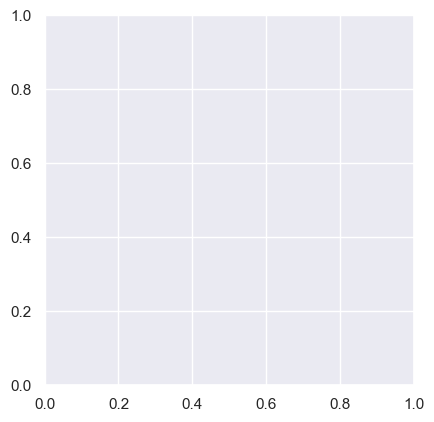

In [115]:
medalhas = londres.Total.value_counts()
plt.pie(..., labels=['Não medalhitas', 'Medalhistas']);  # complete aqui

> Como um teste, refaça o gráfico do item anterior, passando agora o argumento `explode=[0, 0.2]` para a função `pie`. Observe o que acontece com o segmento do gráfico que representa os atletas medalhistas.

In [ ]:
plt.pie(...,
        autopct='%.2f%%', explode=[0, 0.2],
        labels=['Não medalhitas', 'Medalhistas']);
plt.title('Proporção de atletas medalhistas e não medalhistas');

> Gere um gráfico circular (gráfico de setores ou *pie*) para atletas que ganharam uma medalha e atletas que ganharam duas ou mais medalhas.

In [ ]:
plt.pie(...,
        labels=['1 medalha', '2+ medalhas'],
        autopct='%.2f%%');
plt.title('Ganhadores de uma e mais de uma medalha');

> Utilizando *subplots*, faça uma figura que contém os dois gráficos anteriores, lado a lado, representando duas visões do total de medalhas. A figura deverá ser parecida com a que aparece no *slide* 38 da apresentação `04-Pandas`.

**Dica:** utilize `plt.subplots_adjust(right=1.2)` ou outro vaor adequado para ajustar os *subplots*

**Dica:** você pode utilizar `\n` para fazer quebras de linha no título

## Exercício 4

> Existem dados ausentes no *data frame*? Verifique o método `isna`.

**Dica:** o resultado de `isna` é um *data frame*, mas você pode sintetizar esse resultado usando funções de agregação, como `.any` ou `.all`.

**Dica:** você pode especificar um eixo para agregar ao longo das linhas ou das colunas do *data frame*. Caso você especifique `axis=None`, então o resultado será aplicado sobre todos os valores do *data frame*.

> Especificamente para o atributo *peso*, existem valores ausentes?

> Qual a altura média de todos os atletas masculinos? E a dos atletas femininos?

> Qual o peso médio dos atletas?

> Substitua a altura e o peso de todos os atletas com valores ausentes por médias das amostras

> Crie um atributo chamado BMI (*body mass index*) utilizando a relação a seguir.

$$\text{BMI} = \displaystyle\frac{\text{peso}}{\text{altura}^2}~~\text{kg/m}^2$$

> Gere um histograma da distribuição do IMC (índice de massa corpórea—BMI).

> Faça histogramas para estudar as distribuições de IMC de homens e mulheres. Existe diferença no IMC de um gênero para outro?

> Os dados possuem uma cauda muito longa à direita. Faça um histograma apenas dos atletas que possuem IMC maior ou igual a 30

> Uma outra forma de visualizar distribuições é o *boxplot*. Trata-se de um gráfico no qual podemos observar os valores da amostra, incluindo *outliers*. Faça um *boxplot* para identificar *outliers* no atributo IMC.

> Os *outliers* podem atrapalhar nossas aplicações de Aprendizado de Máquina. Existem diversas técnicas para lidar com *outliers* e uma delas é o *clipping*. O *clipping* é obtido determinando-se um ponto de corte em um atributo e agrupando todos os *outliers* com o valor do ponto de corte. Verifique quantos atletas possuem IMC entre 0 e 30 e quantos posuem IMC maior do que 30.

> Separe (guardando os índices) alguns atletas com IMC superior a 30.

> No *clipping*, nós substituímos valores muito altos ou muito pequenos pelo ponto de corte. Aplique *clipping* no atributo IMC para que não haja atletas com IMC > 30.

**Observação**: você não deve *remover* do *data frame* atletas que tenham IMC maior do que 30. Mas qualquer IMC superior a 30 deve ser substituído por exatamente 30.

> Verifique o novo valor de IMC dos atletas que você separou anteriormente.

> Gere um novo histograma para verificar o IMC dos atletas, dos homens e das mulheres (são 3 histogramas; escolha o número adequado de *subplots* para mostrá-los).